# Analise exploratória dos dados de comércio eletronico Brasileiro

Este é um conjunto de dados público de comércio eletrônico brasileiro de pedidos feitos na Olist Store. O conjunto de dados contém informações de 100 mil pedidos de 2016 a 2018 realizados em diversos mercados no Brasil.

https://www.kaggle.com/olistbr/brazilian-ecommerce

# Parte 1
## Objetivos
* Explorar e conhecer as tabelas do conjunto de dados
* Realizar os relacionamentos das tabelas

## Objetivos
* Entendimento geral de negócio
* Tratamento de valores ausentes (missing values)
* Tratamento de pontos fora da curva (outliers)
* Análise univariada
* Análise multivariada
* Geração de insights
* [Validação e testes de hipóteses]()

---
## Importando bibliotecas utilizadas na análise

In [1]:
%matplotlib inline

import pandas as pd
pd.set_option('display.max_columns',None)

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

import os
import warnings
warnings.filterwarnings('ignore')

---
## Importando os dados

__Schema:__

![](https://i.imgur.com/HRhd2Y0.png)

* __olist_orders_dataset :__ Tabela principal, usada para conectar todos os detalhes relacionados a um pedido de compra.
* __olist_order_items_dataset :__ Contém os detalhes de um item que foi comprado.
* __olist_order_reviews_dataset :__ Contém detalhes relacionados a quaisquer comentários postados pelo cliente sobre um determinado produto.
* __olist_products_dataset :__ Contém informações relacionadas a um produto.
* __olist_order_payments_dataset :__ Contém informações relacionadas aos detalhes de pagamento.
* __olist_customers_dataset :__ Contém informações de clientes.
* __olist_geolocation_dataset :__ Contém informações geográficas relacionadas aos vendedores e clientes.
* __olist_sellers_dataset :__ Contém informações relativas a todos os vendedores que se cadastraram nesta empresa.

In [133]:
# definindo o caminho do diretorio com os arquivos de origem dos dados
raw_path = 'G:/Meu Drive/Carreira/Estudos/Data Science/4 - Projetos/data-science/projects/brazilian-ecommerce/data/raw/'

# listando os arquivos do diretorio
files = os.listdir(raw_path)

datasets = []

# criando dataframes a partir dos arquivos
for file in files:
    dataset_name = file.replace('.csv', '')
    dataframe = pd.read_csv(raw_path + file)
    datasets.append(dataset_name)
    globals()[dataset_name] = dataframe

---
## Analisando e relacionando as tabelas

__Premissas gerais:__
* Um pedido (ordem) pode ter vários itens.
* Cada item pode ser atendido por um vendedor distinto.
* Todo o texto que identifica as lojas e parceiros foi substituído pelos nomes das grandes casas de Game of Thrones.

### Analisando a tabela principal: 
#### olist_orders_dataset

* __order_id__: Identificador exclusivo do pedido
* __customer_id__: Chave para o conjunto de dados do cliente. Cada pedido tem um cliente exclusivo.
* __order_status__:   Referência ao status do pedido (entregue, enviado, etc).
* __order_purchase_timestamp__:   Mostra o registro de data e hora da compra.
* __order_approved_at__: Mostra o registro de data e hora de aprovação de pagamento.
* __order_delivered_carrier_date__:  Mostra o cartão posterior de data e hora. Quando foi tratado para o parceiro logístico.
* __order_delivered_customer_date__: Mostra a data real de entrega de pedidos para o cliente.
* __order_estimated_delivery_date__: Mostra a data de entrega estimada informada ao cliente no momento da compra.

In [108]:
olist_orders_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [5]:
olist_orders_dataset.describe()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
count,99441,99441,99441,99441,99281,97658,96476,99441
unique,99441,99441,8,98875,90733,81018,95664,459
top,44cf3a952d8e1d64780add94ffd74dfe,4382a843aa3bf7571f81732d6262bc41,delivered,2018-04-11 10:48:14,2018-02-27 04:31:10,2018-05-09 15:48:00,2018-07-24 21:36:42,2017-12-20 00:00:00
freq,1,1,96478,3,9,47,3,522


`Verificando quais são os 8 diferentes status possíveis e suas frequencias:`

In [85]:
count_status = olist_orders_dataset.groupby('order_status') \
                                   .agg({'order_id':'count'}) \
                                   .sort_values(by='order_id', ascending=False) \
                                   .reset_index().rename(columns={'order_id':'Qtd', 'order_status' : 'Status'})

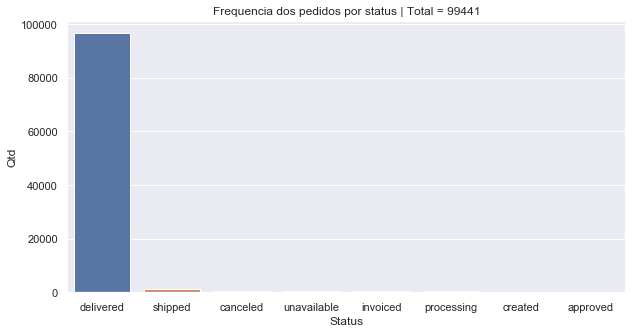

In [66]:
total = count_status.Qtd.sum()

figure = plt.figure(figsize=(10,5))
ax = sns.barplot(data = count_status, x= 'Status', y= 'Qtd')
ax.set_title("Frequencia dos pedidos por status | Total = {}".format(total));

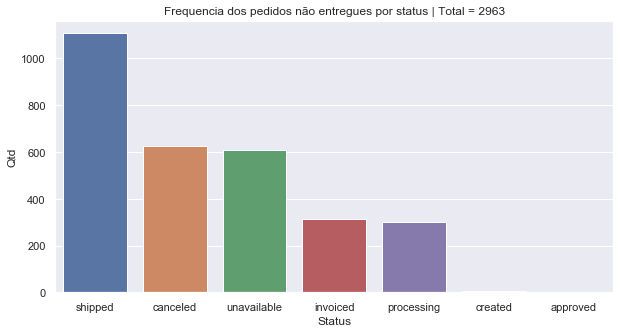

In [86]:
count_status_not_delivered = count_status.query("Status!='delivered'")
total_not_delivered = count_status_without_delivered.Qtd.sum()

figure = plt.figure(figsize=(10,5))
ax = sns.barplot(data = count_status_not_delivered , x= 'Status', y= 'Qtd')
ax.set_title("Frequencia dos pedidos não entregues por status | Total = {}".format(total_not_delivered));

In [72]:
percentage_not_delivered = total_not_delivered / total

print("Percentual de pedidos não entregues: {:.2%}".format(percentage_not_delivered))

Percentual de pedidos não entregues: 2.98%


> Como os **pedidos entregues representam 97% do total** de registros da base, iremos considerar apenas esses pedidos na análise.

In [97]:
orders_delivered = olist_orders_dataset[olist_orders_dataset.order_status=='delivered']

`Vamos aproveitar e relacionar com a tabela de clientes para obter as informações de localidade dos clientes`

In [170]:
orders_delivered = pd.merge(orders_delivered, olist_customers_dataset[['customer_id', 'customer_unique_id', 'customer_city', 'customer_state']], on='customer_id')

#### olist_order_payments_dataset

Este conjunto de dados inclui dados sobre as opções de pagamento de pedidos.

**Campos**
* **order_id** : Identificador exclusivo de um pedido.
* **payment_sequential** : Um cliente pode pagar um pedido com mais de um método de pagamento. Se ele fizer isso, uma sequência será criada.
* **payment_type** : Método de pagamento escolhido pelo cliente.
* **payment_installments** : Número de parcelas escolhido pelo cliente.
* **payment_value** : Valor da transação.

In [144]:
olist_order_payments_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  object 
 3   payment_installments  103886 non-null  int64  
 4   payment_value         103886 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 4.0+ MB


In [152]:
olist_order_payments_dataset.sample(5)

,order_id,payment_sequential,payment_type,payment_installments,payment_value
81380,3dbcc6a75a92370a581e5b39efdc1b0d,1,credit_card,2,62.00
42036,230c3aecc2d5f855e6dd4ce8a98ecf13,1,credit_card,4,40.85
9371,98b71d23b2914a171ca5c5824a1d38b1,1,credit_card,4,43.00
38197,91d3db538cfff9a4f1cd5d5ad9481b05,2,voucher,1,11.00
15117,73d7cec3155fd7d97f4e7bd0c996002e,1,boleto,1,59.09


`Vamos relacionar com a tabela de pagamentos para obter as informações de valores pagos nos pedidos e outros detalhes`
> Precisamos considerar que a tabela **olist_order_payments_dataset** se relaciona com a nossa nova tabela principal **orders_delivered** com cardinalidade de N:1, e por tanto, a tabela resultante desse cruzamento NÃO TERÁ o campo **order_id** com valores únicos (não repetidos).

In [173]:
final_orders_delivered = pd.merge(orders_delivered, olist_order_payments_dataset, on='order_id')

Exemplo de pedido com order_id repetido, pois a compra foi realizada com mais de 1 método de pagamento:

In [175]:
final_orders_delivered.query("order_id=='91d3db538cfff9a4f1cd5d5ad9481b05'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
52446,91d3db538cfff9a4f1cd5d5ad9481b05,93398976408677d44139e085d01c41a3,delivered,2018-02-01 16:32:15,2018-02-01 16:57:04,2018-02-05 11:06:03,2018-02-06 23:52:10,2018-02-19 00:00:00,a1501121525014a1ff9d8247bcdf1e7e,sao paulo,SP,1,credit_card,1,4.68
52447,91d3db538cfff9a4f1cd5d5ad9481b05,93398976408677d44139e085d01c41a3,delivered,2018-02-01 16:32:15,2018-02-01 16:57:04,2018-02-05 11:06:03,2018-02-06 23:52:10,2018-02-19 00:00:00,a1501121525014a1ff9d8247bcdf1e7e,sao paulo,SP,2,voucher,1,11.00
52448,91d3db538cfff9a4f1cd5d5ad9481b05,93398976408677d44139e085d01c41a3,delivered,2018-02-01 16:32:15,2018-02-01 16:57:04,2018-02-05 11:06:03,2018-02-06 23:52:10,2018-02-19 00:00:00,a1501121525014a1ff9d8247bcdf1e7e,sao paulo,SP,3,voucher,1,9.94


---
### Obtendo detalhes sobre os itens dos pedidos

#### olist_order_items_dataset

**Campos:**

* **order_id** : Identificador único do pedido
* **order_item_id** :  Número sequencial. Identificando o número de itens incluídos na mesma ordem.
* **product_id** :  Identificador exclusivo de Produto
* **seller_id** :   Identificador exclusivo do vendedor
* **shipping_limit_date** :  Mostra a data limite de envio do vendedor para lidar com a ordem para o parceiro logístico.
* **price** : Preço do item
* **freight_value** :  Item Item de valor de frete (se um pedido tiver mais de um item, o valor de frete é dividido entre os itens)

**Exemplo:**

O **order_id = 00143d0f86d6fbd9f9b38ab440ac16f5** tem 3 itens (mesmo produto). 
Cada item tem o frete calculado de acordo com suas medidas e peso. Para obter o valor total do frete de cada pedido, basta somar.

O valor total de **produtos** é: 21.33 * 3 = 63.99

O valor total do **frete** é: 15.10 * 3 = 45.30

O valor total do **pedido** (produtos + frete) é: 45.30 + 63.99 = 109.29

In [176]:
olist_order_items_dataset.query("order_id=='00143d0f86d6fbd9f9b38ab440ac16f5'")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
32,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1


**`Vamos relacionar com a tabela de produtos para obter a categoria dos produtos`**

In [135]:
orders_items = pd.merge(olist_order_items_dataset, olist_products_dataset[['product_id', 'product_category_name']], on='product_id')

**`Agora vamos relacionar com a tabela de vendedores para obter informações de localidade dos vendedores`**

In [136]:
orders_items = pd.merge(orders_items, olist_sellers_dataset[['seller_id', 'seller_city', 'seller_state']], on='seller_id')

---

**Cruzando** a tabela de pedidos entregues (**orders_delivered**) com a tabela de detalhe dos items (**olist_order_items_dataset**)

O relacionamento dessas tabelas pode gerar multiplas linhas repetidas, isso porque a cardinalidade desse relacionamento é de N:N.

Considerando isso, precisamos avaliar 3 de 4 cenários possíveis:

* **Cenário 1:** Pedidos com apenas 1 forma de pagamento e N itens (1:N)
* **Cenário 2:** Pedidos com N formas de pagamento e apenas 1 item (N:1)
* **Cenário 3:** Pedidos com N formas de pagamento e N itens (N:N)

O casos de pedidos com 1 forma de pagamento e 1 item não serão avaliados, pois não irão gerar novas linhas.

* **Cenário 1:** (1:N)

In [179]:
final_orders_delivered.query("order_id=='00143d0f86d6fbd9f9b38ab440ac16f5'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
36813,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06 00:00:00,bb8a37225e0279ac8a274c9765617eaf,goiania,GO,1,credit_card,1,109.29


In [186]:
orders_items.query("order_id=='00143d0f86d6fbd9f9b38ab440ac16f5'")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,seller_city,seller_state
14494,00143d0f86d6fbd9f9b38ab440ac16f5,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,esporte_lazer,sorocaba,SP
14495,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,esporte_lazer,sorocaba,SP
14496,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,esporte_lazer,sorocaba,SP


In [190]:
pd.merge(final_orders_delivered, orders_items, on='order_id').query("order_id=='00143d0f86d6fbd9f9b38ab440ac16f5'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,seller_city,seller_state
41983,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06 00:00:00,bb8a37225e0279ac8a274c9765617eaf,goiania,GO,1,credit_card,1,109.29,1,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,esporte_lazer,sorocaba,SP
41984,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06 00:00:00,bb8a37225e0279ac8a274c9765617eaf,goiania,GO,1,credit_card,1,109.29,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,esporte_lazer,sorocaba,SP
41985,00143d0f86d6fbd9f9b38ab440ac16f5,2e45292979b9b2700ea09560eeb0f803,delivered,2017-10-16 15:29:43,2017-10-16 16:07:52,2017-10-16 23:04:43,2017-10-27 18:43:56,2017-11-06 00:00:00,bb8a37225e0279ac8a274c9765617eaf,goiania,GO,1,credit_card,1,109.29,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.1,esporte_lazer,sorocaba,SP


COMMENTS

* **Cenário 2:** (N:1)

In [185]:
final_orders_delivered.query("order_id=='91d3db538cfff9a4f1cd5d5ad9481b05'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value
52446,91d3db538cfff9a4f1cd5d5ad9481b05,93398976408677d44139e085d01c41a3,delivered,2018-02-01 16:32:15,2018-02-01 16:57:04,2018-02-05 11:06:03,2018-02-06 23:52:10,2018-02-19 00:00:00,a1501121525014a1ff9d8247bcdf1e7e,sao paulo,SP,1,credit_card,1,4.68
52447,91d3db538cfff9a4f1cd5d5ad9481b05,93398976408677d44139e085d01c41a3,delivered,2018-02-01 16:32:15,2018-02-01 16:57:04,2018-02-05 11:06:03,2018-02-06 23:52:10,2018-02-19 00:00:00,a1501121525014a1ff9d8247bcdf1e7e,sao paulo,SP,2,voucher,1,11.00
52448,91d3db538cfff9a4f1cd5d5ad9481b05,93398976408677d44139e085d01c41a3,delivered,2018-02-01 16:32:15,2018-02-01 16:57:04,2018-02-05 11:06:03,2018-02-06 23:52:10,2018-02-19 00:00:00,a1501121525014a1ff9d8247bcdf1e7e,sao paulo,SP,3,voucher,1,9.94


In [191]:
orders_items.query("order_id=='91d3db538cfff9a4f1cd5d5ad9481b05'")

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,seller_city,seller_state
83125,91d3db538cfff9a4f1cd5d5ad9481b05,1,ec246911ea63f94a11fc8d78c270153f,febab0275244b9a49a623f0bd613ca2f,2018-02-07 16:57:04,16.9,8.72,instrumentos_musicais,pedreira,SP


In [192]:
pd.merge(final_orders_delivered, orders_items, on='order_id').query("order_id=='91d3db538cfff9a4f1cd5d5ad9481b05'")

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,customer_unique_id,customer_city,customer_state,payment_sequential,payment_type,payment_installments,payment_value,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,seller_city,seller_state
59784,91d3db538cfff9a4f1cd5d5ad9481b05,93398976408677d44139e085d01c41a3,delivered,2018-02-01 16:32:15,2018-02-01 16:57:04,2018-02-05 11:06:03,2018-02-06 23:52:10,2018-02-19 00:00:00,a1501121525014a1ff9d8247bcdf1e7e,sao paulo,SP,1,credit_card,1,4.68,1,ec246911ea63f94a11fc8d78c270153f,febab0275244b9a49a623f0bd613ca2f,2018-02-07 16:57:04,16.9,8.72,instrumentos_musicais,pedreira,SP
59785,91d3db538cfff9a4f1cd5d5ad9481b05,93398976408677d44139e085d01c41a3,delivered,2018-02-01 16:32:15,2018-02-01 16:57:04,2018-02-05 11:06:03,2018-02-06 23:52:10,2018-02-19 00:00:00,a1501121525014a1ff9d8247bcdf1e7e,sao paulo,SP,2,voucher,1,11.00,1,ec246911ea63f94a11fc8d78c270153f,febab0275244b9a49a623f0bd613ca2f,2018-02-07 16:57:04,16.9,8.72,instrumentos_musicais,pedreira,SP
59786,91d3db538cfff9a4f1cd5d5ad9481b05,93398976408677d44139e085d01c41a3,delivered,2018-02-01 16:32:15,2018-02-01 16:57:04,2018-02-05 11:06:03,2018-02-06 23:52:10,2018-02-19 00:00:00,a1501121525014a1ff9d8247bcdf1e7e,sao paulo,SP,3,voucher,1,9.94,1,ec246911ea63f94a11fc8d78c270153f,febab0275244b9a49a623f0bd613ca2f,2018-02-07 16:57:04,16.9,8.72,instrumentos_musicais,pedreira,SP


COMMENS

* **Cenário 3:** (N:N)

In [ ]:
orders_items.query("order_id==''")

In [ ]:
final_orders_delivered.query("order_id==''")

In [ ]:
pd.merge(final_orders_delivered, orders_items, on='order_id').query("order_id==''")

COMMENTS

---